In [1]:
# 0. Import

import os
import sys
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import celloracle as co
# os.chdir("/Users/erickernfeld/Dropbox/pharynx_celloracle")

In [2]:
base_path = "/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/celloracle_pharynx_2021_v2_hyphen_cisbp2/"

In [3]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [4]:
co.network_analysis.test_R_libraries_installation()

R path: /usr/local/bin/R
checking R library installation: igraph -> OK
checking R library installation: linkcomm -> OK
checking R library installation: rnetcarto -> OK


In [5]:
save_folder = "/Users/LoboM/Dropbox/FINAL_CO/"

In [6]:
TFinfo_df = pd.read_csv("/Users/LoboM/Dropbox/peak_motif_matrix.csv",index_col=0)

In [7]:
atac_genes = list(set(TFinfo_df['gene_short_name']).union(set(TFinfo_df.columns)))

In [8]:
len(atac_genes)

17015

# rnaseq data

- fix gene names between atac and rna : Ignore for now

In [19]:
n_top_genes = 10000


adata3 = sc.read_h5ad( "/Users/LoboM/Dropbox/pharynx_celloracle/objects/roadmap/RoadmapSeurat3.rds.h5ad")
adata3.obsm['X_pca'] = sc.read_h5ad("/Users/LoboM/Dropbox/pharynx_celloracle/objects/roadmap/whole_atlas_filtered OLD.h5ad").obsm["X_pca"].copy()
adata3.X = adata3.raw.X.copy()
sc.pp.filter_genes(adata3, min_counts=3)
sc.pp.normalize_per_cell(adata3, key_n_counts='n_counts_all')
# only filter to atac seq genes / peaks 


In [20]:
# solve the . hyphen issue
new_var = []
for entry in list(adata3.var.index):
    new_var.append(entry.replace('.','-'))

In [21]:
for entry in new_var:
    if 'Nkx2' in entry:
        print(entry)

Nkx2-2
Nkx2-2os
Nkx2-6
Nkx2-1
Nkx2-9
Nkx2-5
Nkx2-3


In [22]:
for entry in new_var:
    if '.' in entry:
        print(entry)

In [23]:
for entry in new_var:
    if entry[2:].isupper():
        print(entry)

RP23-138J20-8
RP23-9K14-6
RP23-240M8-2
RP23-106P7-5
RP23-354H24-9
RP23-205F19-4
RP24-492L15-6
RP23-276L17-2
RP24-416M6-5
RP23-60P18-10
RP23-81F19-2
RP23-238I17-9
RP23-361O12-3
RP23-4F16-12
RP24-457L7-3
WI1-2587D24-1
RP23-414I24-10
RP24-445D7-2
RP23-143D11-1
RP24-549B12-4
RP23-85B15-7
RP23-85B15-8
RP23-191I16-3
RP23-222G6-3
RP23-474C17-2
RP23-421O10-2
RP24-191C15-5
RP23-267I20-3
RP23-278M8-1
RP23-89A16-3
RP23-466P2-3
RP24-177G14-2
RP23-36D15-6
RP23-36D15-9
RP24-484I1-3
RP23-324J22-6
RP23-435E16-1
RP23-435E16-3
RP23-291B1-2
RP23-470P9-1
RP23-89C10-2
RP23-472J11-9
RP23-74K24-2
RP23-298C3-14
RP23-361A18-18
RP23-361A18-4
RP23-312I2-8
RP23-455C13-7
RP24-325H17-1
RP24-308M10-2
RP23-218K15-3
RP23-378D16-4
RP23-378D16-5
RP24-236C17-2
RP24-274B19-1
RP24-274B19-2
RP23-54G8-4
RP23-59P20-3
RP23-66E21-1
RP24-172H24-1
RP23-49I18-5
RP23-378L12-3
RP24-238P16-1
RP23-394F19-1
RP23-474J16-2
RP24-286L23-3
RP24-286L23-2
RP24-240G4-4
RP23-449M8-6
RP23-449M8-3
RP23-449M8-5
RP24-362L9-2
RP24-339E15-5
RP23-276E

In [24]:
# fix capitalization
for entry in ['FRMPD2','WDR97','PISD','DHRSX']:
    new_var[new_var.index(entry)] = new_var[new_var.index(entry)].capitalize()

In [25]:
for entry in new_var:
    if entry[2:].isupper() and entry[0:2] != 'RP':
        print(entry)

WI1-2587D24-1
H2-K1
D17H6S53E
H2-D1
H2-Q1
H2-Q2
H2-Q4
H2-Q6
H2-Q7
H2-Q10
H2-T24
H2-T23
H2-T22
H2-T3
H2-M5
H2-M3
H2-M2
CAAA01147332-1


In [27]:
for entry in new_var:
    if entry[2:].isupper() and entry[0:2] != 'RP':
        print(entry)

WI1-2587D24-1
H2-K1
D17H6S53E
H2-D1
H2-Q1
H2-Q2
H2-Q4
H2-Q6
H2-Q7
H2-Q10
H2-T24
H2-T23
H2-T22
H2-T3
H2-M5
H2-M3
H2-M2
CAAA01147332-1


In [28]:
len(new_var)

20662

In [29]:
adata3.var.index = new_var

- subset to genes in ATAC

In [30]:
genes_subset = list(set(atac_genes).intersection(set(adata3.var.index)))

In [31]:
len(genes_subset)

14440

In [32]:
len(set(genes_subset))

14440

In [33]:
len(adata3.var.index)

20662

In [34]:
# duplicate, removed anyway
tmp = []
for entry in adata3.var.index:
    if entry in tmp:
        print(entry)
    else:
        tmp.append(entry)

Pisd


In [35]:
new_idx = list(adata3.var.index)
for idx in range(len(new_idx)):
    if 'Pisd' in new_idx[idx]:
        print(idx)

6298
20659


In [36]:
new_idx[20659] = 'PISD'

In [37]:
adata3.var.index = new_idx

In [38]:
adata3 = adata3[:, genes_subset]

In [39]:
adata3.shape

(54044, 14440)

In [40]:
n_top_genes = 10000
filter_result = sc.pp.filter_genes_dispersion(adata3.X,
                                              flavor='cell_ranger',
                                              n_top_genes=n_top_genes,
                                              log=False)

In [41]:


# Subset the genes
adata3 = adata3[:, filter_result.gene_subset]

# Renormalize after filtering
sc.pp.normalize_per_cell(adata3)

Trying to set attribute `.obs` of view, copying.


In [42]:
pharynx_colors = pd.read_csv("/Users/LoboM/Dropbox/pharynx_celloracle/objects/roadmap/roadmap_colors.csv")

adata3.uns[f"seurat_clusters_colors"] = list(pharynx_colors['colour'])

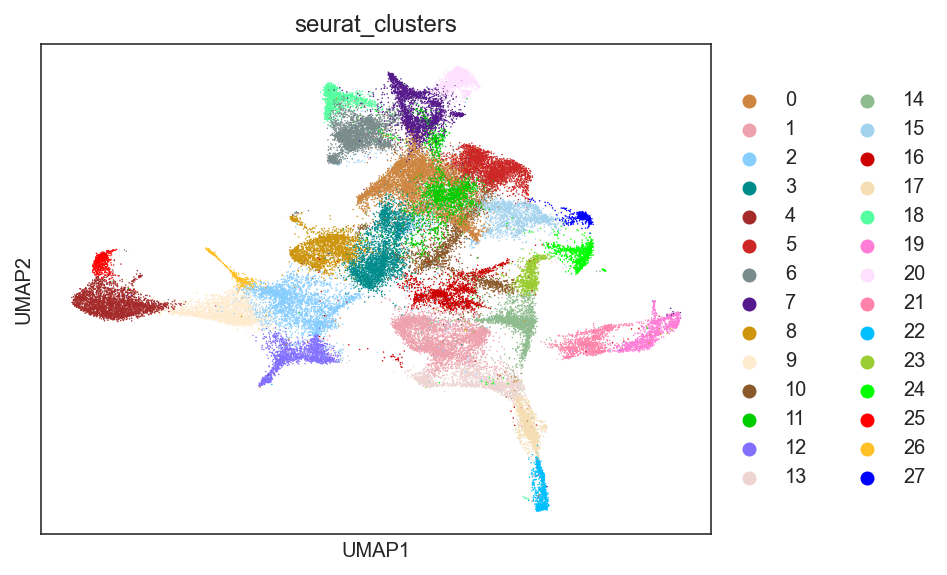

In [43]:
sc.pl.umap(adata3,color='seurat_clusters')

In [44]:
for entry in new_var:
    if 'Nkx2' in entry:
        print(entry)

Nkx2-2
Nkx2-2os
Nkx2-6
Nkx2-1
Nkx2-9
Nkx2-5
Nkx2-3


In [45]:
new_var[0]

'Xkr4'

In [46]:
for entry in adata3.var.index:
    if entry[2:].isupper():
        print(entry)

H2-Q1
H2-Q2
H2-T23
H2-M3
D17H6S53E
H2-D1


In [49]:
list(adata3.var.index).index('Grhl3')

1937

In [50]:
pd.DataFrame(adata3.raw.X.toarray()).max().max()

1885.0

In [51]:
#pharynx_colors = pd.read_csv("/Users/LoboM/Dropbox/pharynx_celloracle/objects/roadmap/roadmap_colors.csv")

#adata3.uns[f"seurat_clusters_colors"] = list(pharynx_colors['colour'])
#adata3.obs["seurat_clusters"] = adata3.obs["seurat_clusters"].copy()
# Instantiate Oracle object.
oracle3 = co.Oracle()
oracle3.import_anndata_as_raw_count(adata=adata3,
                                   cluster_column_name="seurat_clusters",
                                   embedding_name="X_umap")

In [52]:
oracle3.import_TF_data(TF_info_matrix=TFinfo_df)

In [53]:
# Perform PCA
oracle3.perform_PCA()

30


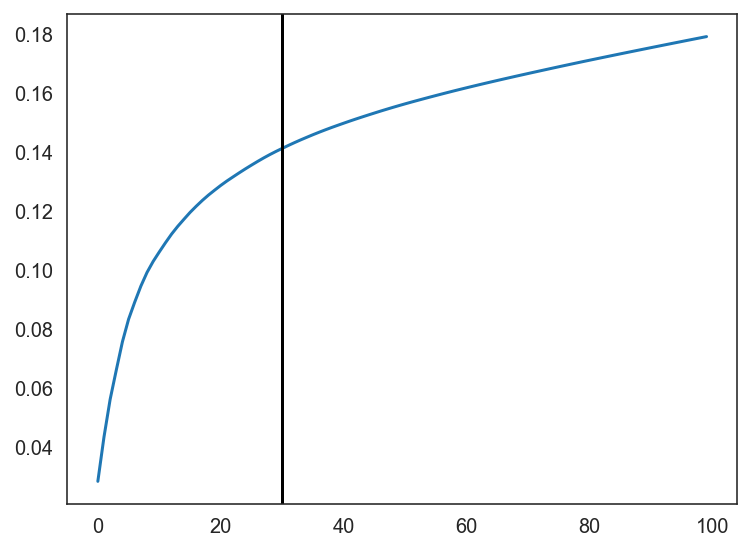

In [54]:


# Select important PCs
plt.plot(np.cumsum(oracle3.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle3.pca.explained_variance_ratio_))>0.001))[0][0]
plt.axvline(n_comps, c="k")
print(n_comps)
n_comps = min(n_comps, 50)
#n_comps = 50 # hard - set

In [55]:
n_comps = 50 # hard - set

In [56]:
n_cell = oracle3.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :54044


In [57]:
k = int(0.001*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :54


In [58]:
oracle3.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

In [60]:
# Save oracle object.
oracle3.to_hdf5(save_folder + "/oracle_initial.celloracle.oracle")

In [61]:
%%time
# This step may take long time.
links3 = oracle3.get_links(cluster_name_for_GRN_unit="seurat_clusters", alpha=10,
                         verbose_level=10, test_mode=False)

inferring GRN for 0...



inferring GRN for 1...



inferring GRN for 10...



inferring GRN for 11...



inferring GRN for 12...



inferring GRN for 13...



inferring GRN for 14...



inferring GRN for 15...



inferring GRN for 16...



inferring GRN for 17...



inferring GRN for 18...



inferring GRN for 19...



inferring GRN for 2...



inferring GRN for 20...



inferring GRN for 21...



inferring GRN for 22...



inferring GRN for 23...



inferring GRN for 24...



inferring GRN for 25...



inferring GRN for 26...



inferring GRN for 27...



inferring GRN for 3...



inferring GRN for 4...



inferring GRN for 5...



inferring GRN for 6...



inferring GRN for 7...



inferring GRN for 8...



inferring GRN for 9...




CPU times: user 5h 49min 12s, sys: 16min 18s, total: 6h 5min 30s
Wall time: 8h 37min 32s


In [62]:
# Set cluster name
os.makedirs(save_folder + "/raw_GRN", exist_ok = True)
for cluster in links3.links_dict.keys():
    links3.links_dict[cluster].to_csv(save_folder + "/raw_GRN/" + cluster + ".csv")

- filter links

In [63]:
links3.filter_links(p=0.001, weight="coef_abs", thread_number=3*10000)

In [64]:
links3.get_score() # network scores for downstream processing

processing... batch 1/2
0: finished.
1: finished.
10: finished.
11: finished.
12: finished.
13: finished.
14: finished.
15: finished.
16: finished.
17: finished.
18: finished.
19: finished.
2: finished.
20: finished.
21: finished.
22: finished.
processing... batch 2/2
23: finished.
24: finished.
25: finished.
26: finished.
27: finished.
3: finished.
4: finished.
5: finished.
6: finished.
7: finished.
8: finished.
9: finished.


In [65]:
links3.to_hdf5(file_path=f"{save_folder}/links.celloracle.links")

- better filtering in next notebook